In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import folium
import io
from PIL import Image
import os, time
# from selenium import webdriver
# import geocoder
from tqdm import tqdm
import geopandas as gpd
# import pygeos

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
# from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score

from pingouin import partial_corr
import pingouin as pg

In [2]:
from sklearn import preprocessing
import xgboost as xgb

In [1265]:
# df = gpd.read_file('beach_slopes_d50_Australia.geojson')
df = gpd.read_file('dataset_Australia_all.geojson')
# df = gpd.read_file('dataset_Australia_East_coast.geojson')

only sand

In [1266]:
df = df[df['d50']<2]
len(df)

# df = df[df['d50']<1]
# len(df)

1272

only east coast

In [1267]:
# df = df[df['longitude']>150] #145
# len(df)

only south

In [1268]:
# df = df[df['latitude']<-25] #145]
# len(df)

only west

In [1269]:
# df = df[df['longitude']<125] #145]
# len(df)

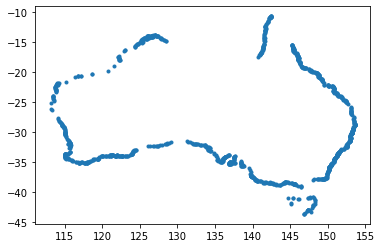

In [1270]:
plt.plot(df['longitude'],df['latitude'],'.')

In [1271]:
df['mstr'] = df['max_tide_obs'] - df['min_tide_obs']
df = df.dropna()
# df.head()
len(df)

1241

In [1272]:
# ind = np.where(df['quality_flag']!='Low')[0]
# len(ind)
# df = df.iloc[ind]
# len(df)

In [1273]:
df['d50'].max()

1.97247

In [358]:

# # ## east coast
# # num_cats = 8
# # num_samples = 14
# # ## 112

# ## whole coast
# num_cats = 10
# num_samples = 24
# ## 240

# tmp['category'] = pd.cut(tmp['latitude'], num_cats)
# tmp = tmp.groupby(['category']).apply(lambda x: x.sample(num_samples, replace = False)).reset_index(drop = True)

# tmp = tmp.drop_duplicates()  

In [359]:
# tmp = df.copy()

# counter = 6 #14 #11 #14
# tmp['category'] = pd.cut(tmp['longitude'], counter)
# tmp = tmp.groupby(['category']).apply(lambda x: x.sample(counter, replace = False)).reset_index(drop = True)

# tmp = tmp.drop_duplicates()  

In [360]:
# df = tmp.copy()
# len(df)

In [1274]:
bujan_path = os.path.normpath('../data/bujan_et_al_data/Size-Slope-Data-Points.csv')


bujan_dat = pd.read_csv(bujan_path)
bujan_dat#.keys()

bujan_sand = bujan_dat[bujan_dat['Clast size (mm)']<2]

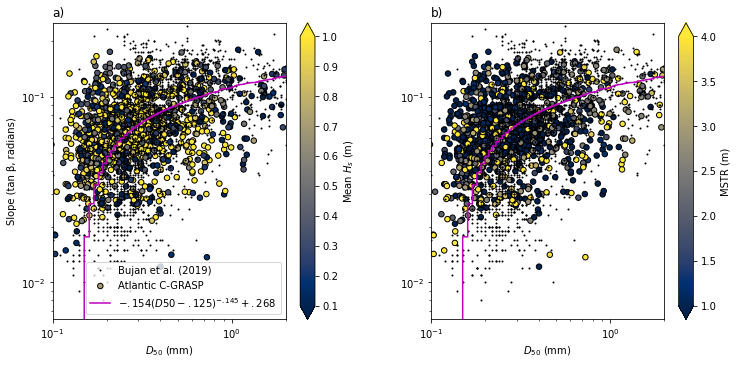

In [1275]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

plt.subplot(221)

plt.loglog(bujan_dat['Clast size (mm)'], bujan_dat['Slope (tan β)'],'ko', markersize=1, label='Bujan et al. (2019)')
# plt.scatter(gs_slope_waves['d50'], gs_slope_waves['tanBeta'],20,gs_slope_waves['hs_mean'],label='Atlantic C-GRASP')
plt.scatter(df['d50'], df['beach_slope_average'],30,df['hsig_median'],label='Atlantic C-GRASP', cmap='cividis', vmin=.1, vmax=1, lw=1,edgecolors='black')

plt.xlabel(r'$D_{50}$ (mm)')

plt.ylabel('Slope (tan β, radians)')
cb = plt.colorbar(extend='both')
plt.title("a)", loc='left')

cb.set_label(r'Mean $H_s$ (m)')

a = -0.154
b = -0.145
c = 0.268
ln = a*( bujan_dat['Clast size (mm)'] - 0.125)**b + c

plt.plot(np.sort(bujan_dat['Clast size (mm)']), np.sort(ln),'m', label=r'$-.154(D50 - .125)^{-.145} + .268$')

plt.xlim(0.1,2)
plt.ylim(10**-2.2,10**-.6)

plt.legend()


plt.subplot(222)
plt.loglog(bujan_dat['Clast size (mm)'], bujan_dat['Slope (tan β)'],'ko', markersize=1, label='Bujan et al. (2019)')
plt.scatter(df['d50'], df['beach_slope_average'],30,df['mstr'],label='Atlantic C-GRASP', cmap='cividis', vmin=1, vmax=4, lw=1,edgecolors='black')

plt.xlabel(r'$D_{50}$ (mm)')

# plt.ylabel('Slope (tan β)')
cb = plt.colorbar(extend='both')

cb.set_label(r'MSTR (m)')

a = -0.154
b = -0.145
c = 0.268
ln = a*( bujan_dat['Clast size (mm)'] - 0.125)**b + c

plt.plot(np.sort(bujan_dat['Clast size (mm)']), np.sort(ln),'m', label=r'$-.154(D50 - .125)^{-.145} + .268$')
plt.title("b)", loc='left')

plt.ylim(10**-2.2,10**-.6)
plt.xlim(0.1,2)

plt.savefig('CGRASP_d50-slope-waveHs-MSTR-Oz.jpg', dpi=300, bbox_inches='tight')

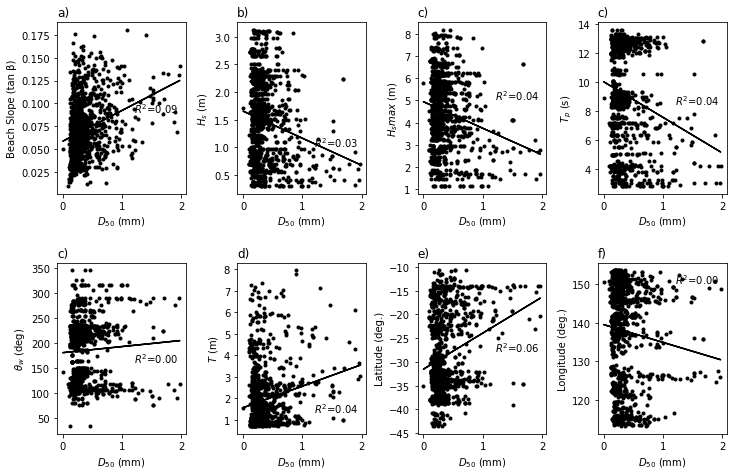

In [1276]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(341)
plt.plot(df['d50'], df['beach_slope_average'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel('Beach Slope (tan β)')
plt.title("a)", loc='left')

coef = np.polyfit(df['d50'], df['beach_slope_average'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['beach_slope_average']))**2
plt.text(1.2,.09,r'$R^2$='+str(r2)[:4])

plt.subplot(342)
plt.plot(df['d50'], df['Hs_mean'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$H_{s}$ (m)')
plt.title("b)", loc='left')

coef = np.polyfit(df['d50'], df['Hs_mean'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['Hs_mean']))**2
plt.text(1.2,1,r'$R^2$='+str(r2)[:4])

plt.subplot(343)
plt.plot(df['d50'], df['Hs_max'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$H_{s} max$ (m)')
plt.title("c)", loc='left')

coef = np.polyfit(df['d50'], df['Hs_max'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['Hs_max']))**2
plt.text(1.2,5,r'$R^2$='+str(r2)[:4])



plt.subplot(344)
plt.plot(df['d50'], df['Tp_mean'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$T_{p}$ (s)')
plt.title("c)", loc='left')

coef = np.polyfit(df['d50'], df['Tp_mean'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['Tp_mean']))**2
plt.text(1.2,8.4,r'$R^2$='+str(r2)[:4])


plt.subplot(345)
plt.plot(df['d50'], df['Wdir_weighted_mean'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$\theta_{w}$ (deg)')
plt.title("c)", loc='left')

coef = np.polyfit(df['d50'], df['Wdir_weighted_mean'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['Wdir_weighted_mean']))**2
plt.text(1.2,160,r'$R^2$='+str(r2)[:4])

plt.subplot(346)
plt.plot(df['d50'], df['mstr'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$T$ (m)')
plt.title("d)", loc='left')

coef = np.polyfit(df['d50'], df['mstr'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['mstr']))**2
plt.text(1.2,1.3,r'$R^2$='+str(r2)[:4])


plt.subplot(347)
plt.plot(df['d50'], df['latitude'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'Latitude (deg.)')
plt.title("e)", loc='left')

coef = np.polyfit(df['d50'], df['latitude'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['latitude']))**2
plt.text(1.2,-28,r'$R^2$='+str(r2)[:4])

plt.subplot(348)
plt.plot(df['d50'], df['longitude'],'k.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'Longitude (deg.)')
plt.title("f)", loc='left')

coef = np.polyfit(df['d50'], df['longitude'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['longitude']))**2
plt.text(1.2,150,r'$R^2$='+str(r2)[:4])

plt.savefig('CGRASP_d50-allcovars-linreg-Oz.jpg', dpi=300, bbox_inches='tight')

In [1277]:
tmp = df.copy()

In [1278]:
X = pg.pairwise_corr(tmp[['beach_slope_average','d50','mstr','Tp_mean','Wdir_weighted_mean','Hs_max']].copy(), columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)

In [1279]:
X_micro = pg.pairwise_corr(tmp[['beach_slope_average','d50','mstr','Tp_mean','Wdir_weighted_mean','Hs_max']].copy()[tmp['mstr']<1], columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)

In [1280]:
X_macro = pg.pairwise_corr(tmp[['beach_slope_average','d50','mstr','Tp_mean','Wdir_weighted_mean','Hs_max']].copy()[tmp['mstr']>4], columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)

In [1281]:
X_meso = pg.pairwise_corr(tmp[['beach_slope_average','d50','mstr','Tp_mean','Wdir_weighted_mean','Hs_max']].copy()[(tmp['mstr']>=1) & (tmp['mstr']<=4)], columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)

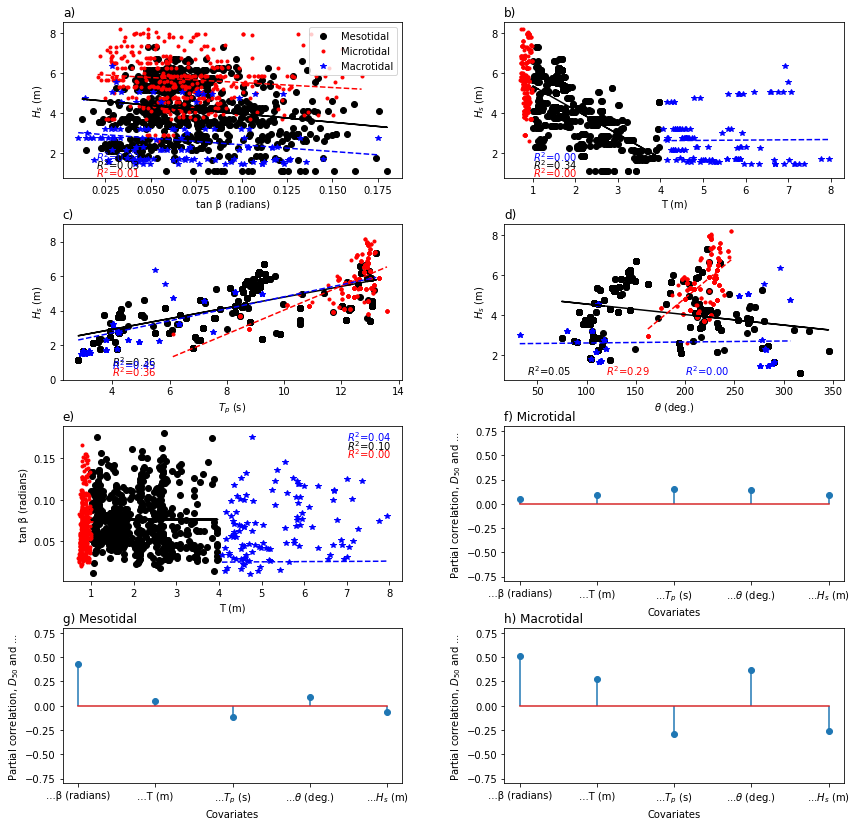

In [1285]:
plt.figure(figsize=(14,14))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

#=================================
# plt.subplot(331)
plt.subplot(421)
plt.plot(tmp['beach_slope_average'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],tmp['Hs_max'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],'ko', label='Mesotidal')
plt.plot(tmp['beach_slope_average'][tmp['mstr']<1],tmp['Hs_max'][tmp['mstr']<1],'r.', label='Microtidal')
plt.plot(tmp['beach_slope_average'][tmp['mstr']>4],tmp['Hs_max'][tmp['mstr']>4],'b*', label='Macrotidal')

coef = np.polyfit(tmp['beach_slope_average'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],tmp['Hs_max'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['beach_slope_average'][(tmp['mstr']>=1) & (tmp['mstr']<=4)], poly1d_fn(tmp['beach_slope_average'][(tmp['mstr']>=1) & (tmp['mstr']<=4)]), '-k')

coef = np.polyfit(tmp['beach_slope_average'][tmp['mstr']<1],tmp['Hs_max'][tmp['mstr']<1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['beach_slope_average'][tmp['mstr']<1]), poly1d_fn(sorted(tmp['beach_slope_average'][tmp['mstr']<1])), '--r')

coef = np.polyfit(tmp['beach_slope_average'][tmp['mstr']>4],tmp['Hs_max'][tmp['mstr']>4],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['beach_slope_average'][tmp['mstr']>4]), poly1d_fn(sorted(tmp['beach_slope_average'][tmp['mstr']>4])), '--b')

r2 = np.min(np.corrcoef(tmp['Hs_max'][(tmp['mstr']>=1) & (tmp['mstr']<=4)], tmp['beach_slope_average'][(tmp['mstr']>=1) & (tmp['mstr']<=4)]))**2
plt.text(.02,1.2,r'$R^2$='+str(r2)[:4])

r2 = np.min(np.corrcoef(tmp['Hs_max'][tmp['mstr']<1], tmp['beach_slope_average'][tmp['mstr']<1]))**2
plt.text(.02,.8,r'$R^2$='+str(r2)[:4], color='r')

r2 = np.min(np.corrcoef(tmp['Hs_max'][tmp['mstr']>4], tmp['beach_slope_average'][tmp['mstr']>4]))**2
plt.text(.02,1.6,r'$R^2$='+str(r2)[:4], color='b')

plt.ylabel(r'$H_s$ (m)')
plt.xlabel(r'tan β (radians)')
plt.title(r"a)", loc='left')
plt.legend()

#================================
# plt.subplot(332)
plt.subplot(422)
plt.plot(tmp['mstr'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],tmp['Hs_max'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],'ko')
plt.plot(tmp['mstr'][tmp['mstr']<1],tmp['Hs_max'][tmp['mstr']<1],'r.')
plt.plot(tmp['mstr'][tmp['mstr']>4],tmp['Hs_max'][tmp['mstr']>4],'b*')

coef = np.polyfit(tmp['mstr'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],tmp['Hs_max'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['mstr'][(tmp['mstr']>=1) & (tmp['mstr']<=4)], poly1d_fn(tmp['mstr'][(tmp['mstr']>=1) & (tmp['mstr']<=4)]), '-k')

coef = np.polyfit(tmp['mstr'][tmp['mstr']<1],tmp['Hs_max'][tmp['mstr']<1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['mstr'][tmp['mstr']<1]), poly1d_fn(sorted(tmp['mstr'][tmp['mstr']<1])), '--r')

coef = np.polyfit(tmp['mstr'][tmp['mstr']>=4],tmp['Hs_max'][tmp['mstr']>=4],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['mstr'][tmp['mstr']>=4]), poly1d_fn(sorted(tmp['mstr'][tmp['mstr']>=4])), '--b')

r2 = np.min(np.corrcoef(tmp['Hs_max'][(tmp['mstr']>=1) & (tmp['mstr']<=4)], tmp['mstr'][(tmp['mstr']>=1) & (tmp['mstr']<=4)]))**2
plt.text(1,1.2,r'$R^2$='+str(r2)[:4])

r2 = np.min(np.corrcoef(tmp['Hs_max'][tmp['mstr']<1], tmp['mstr'][tmp['mstr']<1]))**2
plt.text(1,.8,r'$R^2$='+str(r2)[:4], color='r')

r2 = np.min(np.corrcoef(tmp['Hs_max'][tmp['mstr']>=4], tmp['mstr'][tmp['mstr']>=4]))**2
plt.text(1,1.6,r'$R^2$='+str(r2)[:4], color='b')

plt.ylabel(r'$H_s$ (m)')
plt.xlabel(r'T (m)')
plt.title(r"b)", loc='left')

#=================================
# plt.subplot(334)
plt.subplot(423)
plt.plot(tmp['Tp_mean'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],tmp['Hs_max'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],'ko')
plt.plot(tmp['Tp_mean'][tmp['mstr']<1],tmp['Hs_max'][tmp['mstr']<1],'r.')
plt.plot(tmp['Tp_mean'][tmp['mstr']>4],tmp['Hs_max'][tmp['mstr']>4],'b*')

coef = np.polyfit(tmp['Tp_mean'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],tmp['Hs_max'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['Tp_mean'][tmp['mstr']>=1], poly1d_fn(tmp['Tp_mean'][tmp['mstr']>=1]), '-k')

coef = np.polyfit(tmp['Tp_mean'][tmp['mstr']<1],tmp['Hs_max'][tmp['mstr']<1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['Tp_mean'][tmp['mstr']<1]), poly1d_fn(sorted(tmp['Tp_mean'][tmp['mstr']<1])), '--r')

coef = np.polyfit(tmp['Tp_mean'][tmp['mstr']>1],tmp['Hs_max'][tmp['mstr']>1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['Tp_mean'][tmp['mstr']>1]), poly1d_fn(sorted(tmp['Tp_mean'][tmp['mstr']>1])), '--b')

r2 = np.min(np.corrcoef(tmp['Hs_max'][(tmp['mstr']>=1) & (tmp['mstr']<=4)], tmp['Tp_mean'][(tmp['mstr']>=1) & (tmp['mstr']<=4)]))**2
plt.text(4,1.4,r'$R^2$='+str(r2)[:4])

r2 = np.min(np.corrcoef(tmp['Hs_max'][tmp['mstr']<1], tmp['Tp_mean'][tmp['mstr']<1]))**2
plt.text(4,.2,r'$R^2$='+str(r2)[:4], color='r')

r2 = np.min(np.corrcoef(tmp['Hs_max'][tmp['mstr']>1], tmp['Tp_mean'][tmp['mstr']>1]))**2
plt.text(4,.8,r'$R^2$='+str(r2)[:4], color='b')

plt.ylabel(r'$H_s$ (m)')
plt.xlabel(r'$T_p$ (s)')
plt.title(r"c)", loc='left')
plt.ylim(0,9)

#=================================
# plt.subplot(335)
plt.subplot(424)
plt.plot(tmp['Wdir_weighted_mean'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],tmp['Hs_max'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],'ko')
plt.plot(tmp['Wdir_weighted_mean'][tmp['mstr']<1],tmp['Hs_max'][tmp['mstr']<1],'r.')
plt.plot(tmp['Wdir_weighted_mean'][tmp['mstr']>4],tmp['Hs_max'][tmp['mstr']>4],'b*')

coef = np.polyfit(tmp['Wdir_weighted_mean'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],tmp['Hs_max'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['Wdir_weighted_mean'][(tmp['mstr']>=1) & (tmp['mstr']<=4)], poly1d_fn(tmp['Wdir_weighted_mean'][(tmp['mstr']>=1) & (tmp['mstr']<=4)]), '-k')

coef = np.polyfit(tmp['Wdir_weighted_mean'][tmp['mstr']<1],tmp['Hs_max'][tmp['mstr']<1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['Wdir_weighted_mean'][tmp['mstr']<1]), poly1d_fn(sorted(tmp['Wdir_weighted_mean'][tmp['mstr']<1])), '--r')

coef = np.polyfit(tmp['Wdir_weighted_mean'][tmp['mstr']>4],tmp['Hs_max'][tmp['mstr']>4],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['Wdir_weighted_mean'][tmp['mstr']>4]), poly1d_fn(sorted(tmp['Wdir_weighted_mean'][tmp['mstr']>4])), '--b')

r2 = np.min(np.corrcoef(tmp['Hs_max'][(tmp['mstr']>=1) & (tmp['mstr']<=4)], tmp['Wdir_weighted_mean'][(tmp['mstr']>=1) & (tmp['mstr']<=4)]))**2
plt.text(40,1,r'$R^2$='+str(r2)[:4])

r2 = np.min(np.corrcoef(tmp['Hs_max'][tmp['mstr']<1], tmp['Wdir_weighted_mean'][tmp['mstr']<1]))**2
plt.text(120,1,r'$R^2$='+str(r2)[:4], color='r')

r2 = np.min(np.corrcoef(tmp['Hs_max'][tmp['mstr']>4], tmp['Wdir_weighted_mean'][tmp['mstr']>4]))**2
plt.text(200,1,r'$R^2$='+str(r2)[:4], color='b')

plt.ylabel(r'$H_s$ (m)')
plt.xlabel(r'$\theta$ (deg.)')
plt.title(r"d)", loc='left')

#=================================
# plt.subplot(233)
plt.subplot(425)
plt.plot(tmp['mstr'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],tmp['beach_slope_average'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],'ko')
plt.plot(tmp['mstr'][tmp['mstr']<1],tmp['beach_slope_average'][tmp['mstr']<1],'r.')
plt.plot(tmp['mstr'][tmp['mstr']>4],tmp['beach_slope_average'][tmp['mstr']>4],'b*')

coef = np.polyfit(tmp['mstr'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],tmp['beach_slope_average'][(tmp['mstr']>=1) & (tmp['mstr']<=4)],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['mstr'][(tmp['mstr']>=1) & (tmp['mstr']<=4)], poly1d_fn(tmp['beach_slope_average'][(tmp['mstr']>=1) & (tmp['mstr']<=4)]), '-k')

# coef = np.polyfit(tmp['mstr'][(tmp['mstr']<1)],tmp['beach_slope_average'][(tmp['mstr']<1)],1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(tmp['mstr'][(tmp['mstr']<1)], poly1d_fn(tmp['beach_slope_average'][(tmp['mstr']<1)]), '--r')

# coef = np.polyfit(tmp['mstr'][(tmp['mstr']>4)],tmp['beach_slope_average'][(tmp['mstr']>4)],1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(tmp['mstr'][(tmp['mstr']>4)], poly1d_fn(tmp['beach_slope_average'][(tmp['mstr']>4)]), '--b')

coef = np.polyfit(tmp['mstr'][tmp['mstr']<1],tmp['beach_slope_average'][tmp['mstr']<1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['mstr'][tmp['mstr']<1]), poly1d_fn(sorted(tmp['beach_slope_average'][tmp['mstr']<1])), '--r')

coef = np.polyfit(tmp['mstr'][tmp['mstr']>4],tmp['beach_slope_average'][tmp['mstr']>4],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(sorted(tmp['mstr'][tmp['mstr']>4]), poly1d_fn(sorted(tmp['beach_slope_average'][tmp['mstr']>4])), '--b')


r2 = np.min(np.corrcoef(tmp['beach_slope_average'][(tmp['mstr']>=1) & (tmp['mstr']<=4)], tmp['mstr'][(tmp['mstr']>=1) & (tmp['mstr']<=4)]))**2
plt.text(7,0.16,r'$R^2$='+str(.1+r2)[:4])

r2 = np.min(np.corrcoef(tmp['beach_slope_average'][tmp['mstr']<1], tmp['mstr'][tmp['mstr']<1]))**2
plt.text(7,0.15,r'$R^2$='+str(r2)[:4], color='r')

r2 = np.min(np.corrcoef(tmp['beach_slope_average'][tmp['mstr']>4], tmp['mstr'][tmp['mstr']>4]))**2
plt.text(7,0.17,r'$R^2$='+str(r2)[:4], color='b')

plt.ylabel(r'tan β (radians)')
plt.xlabel(r'T (m)')
plt.title(r"e)", loc='left')

#=================================
ax=plt.subplot(426)
plt.stem(X_micro['r'])
# plt.stem(lower)
# plt.stem(upper)
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (radians)','...T (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-.8,.8)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"f) Microtidal", loc='left')

#=================================
ax=plt.subplot(427)
plt.stem(X_meso['r'])
# plt.stem(lower)
# plt.stem(upper)
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (radians)','...T (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-.8,.8)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"g) Mesotidal", loc='left')

#=================================
ax=plt.subplot(428)
plt.stem(X_macro['r'])
# plt.stem(lower)
# plt.stem(upper)
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (radians)','...T (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-.8,.8)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"h) Macrotidal", loc='left')

plt.savefig('multicol_plus_partial_correl_Oz.jpg', dpi=300, bbox_inches='tight')

In [1286]:
len(df)

1241

In [1287]:
ind = np.where((df['mstr']>=1) & (df['mstr']<=4))[0]
len(ind)
df_meso = df.iloc[ind]
len(df_meso)

741

In [1288]:
ind = np.where(df['mstr']<1)[0]
len(ind)
df_micro = df.iloc[ind]
len(df_micro)

386

In [1289]:
ind = np.where(df['mstr']>4)[0]
len(ind)
df_macro = df.iloc[ind]
len(df_macro)

114

In [1290]:
tmp_meso = df_meso.copy()

# ## whole coast
# num_cats = 10
# num_samples = 21
# ## 112

# tmp_meso['category'] = pd.cut(tmp_meso['latitude'], num_cats)
# tmp_meso = tmp_meso.groupby(['category']).apply(lambda x: x.sample(num_samples, replace = False)).reset_index(drop = True)

# tmp_meso = tmp_meso.drop_duplicates() 
len(tmp_meso)

741

In [1291]:
tmp_micro = df_micro.copy()

# ## whole coast
# num_cats = 2
# num_samples = 38

# tmp_micro['category'] = pd.cut(tmp_micro['latitude'], num_cats)
# tmp_micro = tmp_micro.groupby(['category']).apply(lambda x: x.sample(num_samples, replace = False)).reset_index(drop = True)

# tmp_micro = tmp_micro.drop_duplicates() 
len(tmp_micro)

386

In [1292]:
tmp_macro = df_macro.copy()

# ## whole coast
# num_cats = 5
# num_samples = 6

# tmp_macro['category'] = pd.cut(tmp_macro['latitude'], num_cats)
# tmp_macro = tmp_macro.groupby(['category']).apply(lambda x: x.sample(num_samples, replace = False)).reset_index(drop = True)

# tmp_macro = tmp_macro.drop_duplicates() 
len(tmp_macro)

114

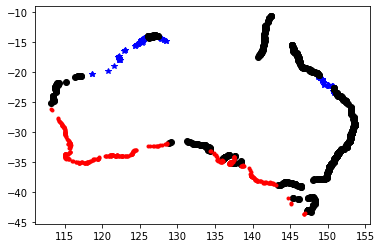

In [1293]:
plt.plot(tmp_macro['longitude'],tmp_macro['latitude'],'b*')
plt.plot(tmp_meso['longitude'],tmp_meso['latitude'],'ko')
plt.plot(tmp_micro['longitude'],tmp_micro['latitude'],'r.')

In [1294]:
a = -0.154
b = -0.145
c = 0.268

def mcfall(X,hs):
    if hs<=1:
        A = 3.1; n = -1.1 
    elif hs>=3:
        A = 3.9; n = -1.85         
    else:
        A = 2.1; n = -1.8             
    return (X/A)**(1/n)

def prc_err(y,yest):
    return 100*(np.abs(y-yest)/y)

def bujan(B,a,b,c):
    t1=(B-c)
    return (1/8)*(8*((t1/a))**(1/b)+1)


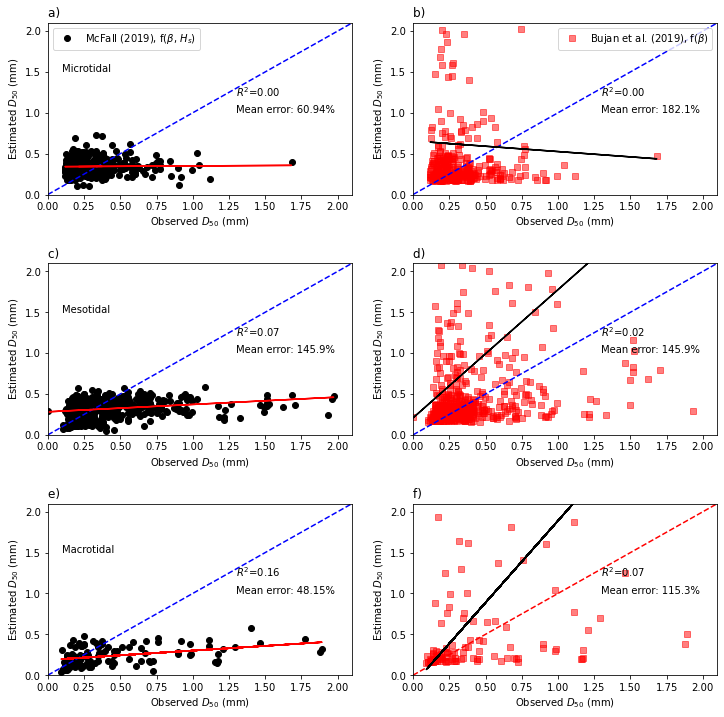

In [1296]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

#========================================

ds_est_baseline = [mcfall(X,hs) for X,hs in zip(1/tmp_micro['beach_slope_average'],tmp_micro['Hs_mean'])]
ds_est_baseline2 = [bujan(B,a,b,c) for B in tmp_micro['beach_slope_average']]

plt.subplot(321)
plt.plot(tmp_micro['d50'], ds_est_baseline, 'ko', label=r'McFall (2019), f($\beta$, $H_s$)')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--b')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) ", loc='left')
r2 = np.min(np.corrcoef(tmp_micro['d50'], ds_est_baseline))**2
plt.text(1.3,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(tmp_micro['d50'], ds_est_baseline,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp_micro['d50'], poly1d_fn(tmp_micro['d50']), '-r')
plt.legend()

plt.text(1.3,1.0, r'Mean error: {}%'.format(str(np.mean(prc_err(tmp_micro['d50'], ds_est_baseline)))[:5]))
plt.text(.1,1.5,'Microtidal')

plt.subplot(322)
plt.plot(tmp_micro['d50'], ds_est_baseline2, 'rs', alpha=0.5, label=r"Bujan et al. (2019), f($\beta$)")
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--b')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) ", loc='left') #Bujan et al. (2019) relation, f($\beta$)
r2 = np.min(np.corrcoef(tmp_micro['d50'], ds_est_baseline2))**2
plt.text(1.3,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(tmp_micro['d50'], ds_est_baseline2,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp_micro['d50'], poly1d_fn(tmp_micro['d50']), '-k')
plt.legend()
plt.text(1.3,1.0, r'Mean error: {}%'.format(str(np.mean(prc_err(tmp_micro['d50'], ds_est_baseline2)))[:5]))


##====================================

ds_est_baseline = [mcfall(X,hs) for X,hs in zip(1/tmp_meso['beach_slope_average'],tmp_meso['Hs_mean'])]
ds_est_baseline2 = [bujan(B,a,b,c) for B in tmp_meso['beach_slope_average']]

plt.subplot(323)
plt.plot(tmp_meso['d50'], ds_est_baseline, 'ko', label=r'McFall (2019), f($\beta$, $H_s$)')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--b')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) ", loc='left')
r2 = np.min(np.corrcoef(tmp_meso['d50'], ds_est_baseline))**2
plt.text(1.3,1.2,r'$R^2$='+str(r2)[:4], color='k')

pe = prc_err(tmp_meso['d50'], ds_est_baseline2).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(1.3,1.0,r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

coef = np.polyfit(tmp_meso['d50'], ds_est_baseline,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp_meso['d50'], poly1d_fn(tmp_meso['d50']), '-r')
plt.text(.1,1.5,'Mesotidal')


plt.subplot(324)
plt.plot(tmp_meso['d50'], ds_est_baseline2, 'rs', alpha=0.5, label=r"Bujan et al. (2019), f($\beta$)")
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--b')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) ", loc='left') #Bujan et al. (2019) relation, f($\beta$)
r2 = np.min(np.corrcoef(tmp_meso['d50'], ds_est_baseline2))**2
plt.text(1.3,1.2,r'$R^2$='+str(r2)[:4], color='k')

pe = prc_err(tmp_meso['d50'], ds_est_baseline2).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(1.3,1.0, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

coef = np.polyfit(tmp_meso['d50'], ds_est_baseline2,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp_meso['d50'], poly1d_fn(tmp_meso['d50']), '-k')
# plt.legend()

#========================================

ds_est_baseline = [mcfall(X,hs) for X,hs in zip(1/tmp_macro['beach_slope_average'],tmp_macro['Hs_mean'])]
ds_est_baseline2 = [bujan(B,a,b,c) for B in tmp_macro['beach_slope_average']]

plt.subplot(325)
plt.plot(tmp_macro['d50'], ds_est_baseline, 'ko', label=r'McFall (2019), f($\beta$, $H_s$)')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--b')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) ", loc='left')
r2 = np.min(np.corrcoef(tmp_macro['d50'], ds_est_baseline))**2
plt.text(1.3,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(tmp_macro['d50'], ds_est_baseline,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp_macro['d50'], poly1d_fn(tmp_macro['d50']), '-r')
plt.text(1.3,1.0, r'Mean error: {}%'.format(str(np.mean(prc_err(tmp_macro['d50'], ds_est_baseline)))[:5]))
plt.text(.1,1.5,'Macrotidal')

plt.subplot(326)
plt.plot(tmp_macro['d50'], ds_est_baseline2, 'rs', alpha=0.5, label=r"Bujan et al. (2019), f($\beta$)")
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) ", loc='left') #Bujan et al. (2019) relation, f($\beta$)
r2 = np.min(np.corrcoef(tmp_macro['d50'], ds_est_baseline2))**2
plt.text(1.3,1.2,r'$R^2$='+str(r2)[:4], color='k')
plt.text(1.3,1.0, r'Mean error: {}%'.format(str(np.mean(prc_err(tmp_macro['d50'], ds_est_baseline2)))[:5]))

coef = np.polyfit(tmp_macro['d50'], ds_est_baseline2,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp_macro['d50'], poly1d_fn(tmp_macro['d50']), '-k')
# plt.legend()

plt.savefig('CGRASP_d50_Oz-baselines.jpg', dpi=300, bbox_inches='tight')
# plt.close()

### ALL tides

In [1297]:
params = {
    "n_estimators": 5000,
    "max_depth": 3, #4,
    "min_samples_split": 5, #10,
    "learning_rate": 0.001, #0.01,
    "loss": "squared_error",
#     "subsample": 0.25,
#     "max_leaf_nodes": 10,
}

# ### xgboost
# params = {
#     'n_estimators':5000, 
#     'max_depth':3, 
#     'eta':0.001,  ##lr
#     'subsample':0.25, 
#     'colsample_bytree':1.0
# }

test_size = 0.75

In [1298]:
rand = np.random.randn(len(df))
np.save('Oz_rand.npy', rand, allow_pickle=True)

In [1299]:
feature_names1 = ['β (radians)',r'$H_s$ (m)', 'T (m)',r'$T_p$ (s)', r'$\theta$ (dir.)','Random (non-dim.)'] 
X = np.stack((df['beach_slope_average'],df['Hs_max'],df['mstr'] ,df['Tp_mean'],df['Wdir_weighted_mean'],  rand)) 
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

# model1 = xgb.XGBRFRegressor(**params)
model1 = ensemble.GradientBoostingRegressor(**params)
# model1 = ensemble.HistGradientBoostingRegressor()#**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

The mean squared error (MSE) on test set: 0.0580


In [1207]:
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2022)
# # evaluate model
# scores = cross_val_score(model1, X.T, df['d50'], scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# # force scores to be positive
# scores = np.absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [1300]:
feature_names2 = [r'β (radians)','T (m)', 'Random (non-dim.)']
X = np.stack((df['beach_slope_average'],df['mstr'], rand))
X.shape

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

# model2 = svm.SVR()
# model2 = xgb.XGBRFRegressor(**params)
model2 = ensemble.GradientBoostingRegressor(**params)
# model2 = ensemble.HistGradientBoostingRegressor()#**params)
model2.fit(X_train2, y_train2)

mse2 = mean_squared_error(y_test2, model2.predict(X_test2))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse2))

The mean squared error (MSE) on test set: 0.0620


In [1209]:
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2022)
# # evaluate model
# scores = cross_val_score(model2, X.T, df['d50'], scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# # force scores to be positive
# scores = np.absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [1301]:
feature_names3 = [r'$H_s$ (m)', r'$T_p$ (s)', r'$\theta$ (dir.)', 'Random (non-dim.)'] #
X = np.stack((df['Hs_max'],df['Tp_mean'],df['Wdir_weighted_mean'], rand)) 
X.shape

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train3)
X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)

# model3 = xgb.XGBRFRegressor(**params)
# model3 = ensemble.HistGradientBoostingRegressor()#**params)
model3 = ensemble.GradientBoostingRegressor(**params)
model3.fit(X_train3, y_train3)

mse3 = mean_squared_error(y_test3, model3.predict(X_test3))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse3))

The mean squared error (MSE) on test set: 0.0684


In [1302]:
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2022)
# # evaluate model
# scores = cross_val_score(model3, X.T, df['d50'], scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# # force scores to be positive
# scores = np.absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [1303]:
feature_names4 = [r'$H_s$ (m)', 'T (m)',r'$T_p$ (s)', r'$\theta$ (dir.)', 'Random (non-dim.)'] #
X = np.stack((df['Hs_max'],df['mstr'] ,df['Tp_mean'],df['Wdir_weighted_mean'], rand)) 
X.shape

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train4)
X_train4 = scaler.transform(X_train4)
X_test4 = scaler.transform(X_test4)

# model4 = xgb.XGBRFRegressor(**params)
model4 = ensemble.GradientBoostingRegressor(**params)
# model4 = ensemble.HistGradientBoostingRegressor()#**params)
model4.fit(X_train4, y_train4)

mse4 = mean_squared_error(y_test4, model4.predict(X_test4))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse4))

The mean squared error (MSE) on test set: 0.0681


In [1304]:
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2022)
# # evaluate model
# scores = cross_val_score(model4, X.T, df['d50'], scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# # force scores to be positive
# scores = np.absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [1305]:
feature_names6 = [r'β (radians)', r'$H_s$ (m)', 'Random (non-dim.)']
X = np.stack((df['beach_slope_average'], df['Hs_max'], rand))
X.shape

X_train6, X_test6, y_train6, y_test6 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train6)
X_train6 = scaler.transform(X_train6)
X_test6 = scaler.transform(X_test6)

# model6 = xgb.XGBRFRegressor(**params)
# model6 = ensemble.HistGradientBoostingRegressor()#**params)
model6 = ensemble.GradientBoostingRegressor(**params)
model6.fit(X_train6, y_train6)

mse6 = mean_squared_error(y_test6, model6.predict(X_test6))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse6))

The mean squared error (MSE) on test set: 0.0641


In [1306]:
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2022)
# # evaluate model
# scores = cross_val_score(model6, X.T, df['d50'], scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# # force scores to be positive
# scores = np.absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [1307]:
feature_names7 = [r'β (radians)', 'Random (non-dim.)']
X = np.stack((df['beach_slope_average'], rand))
X.shape

X_train7, X_test7, y_train7, y_test7 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train7)
X_train7 = scaler.transform(X_train7)
X_test7 = scaler.transform(X_test7)

# model7 = xgb.XGBRFRegressor(**params)
# model7 = ensemble.HistGradientBoostingRegressor()#**params)
model7 = ensemble.GradientBoostingRegressor(**params)
model7.fit(X_train7, y_train7)

mse7 = mean_squared_error(y_test7, model7.predict(X_test7))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse7))

The mean squared error (MSE) on test set: 0.0712


In [1308]:
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2022)
# # evaluate model
# scores = cross_val_score(model7, X.T, df['d50'], scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# # force scores to be positive
# scores = np.absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

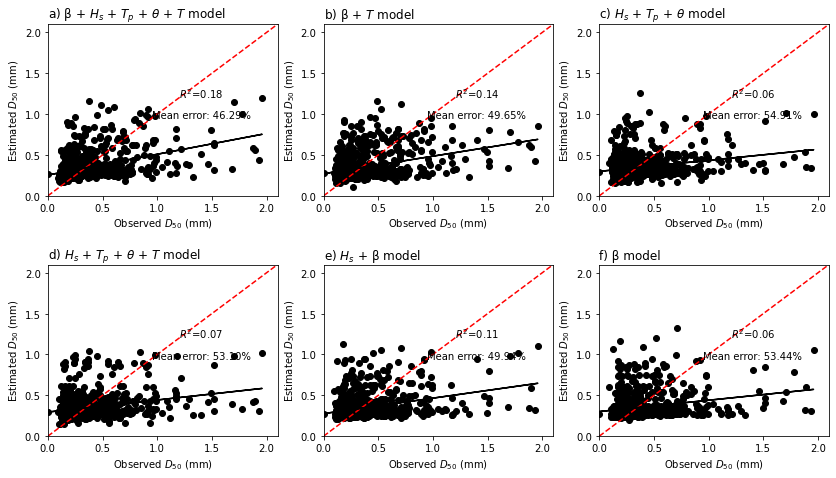

In [1309]:
plt.figure(figsize=(14,12))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.subplot(331)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) β + $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

pe = prc_err(y_test1, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.95,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')

plt.subplot(332)
ds_est = model2.predict(X_test2)
plt.plot(y_test2, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("b) β + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test2, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test2, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test2, poly1d_fn(y_test2), '-k')

pe = prc_err(y_test2, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.95,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

plt.subplot(333)
ds_est = model3.predict(X_test3)
plt.plot(y_test3, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) $H_s$ + $T_p$ + $\theta$ model", loc='left')
r2 = np.min(np.corrcoef(y_test3, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test3, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test3, poly1d_fn(y_test3), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test3,ds_est)))[:5]))
pe = prc_err(y_test3, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.95,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

plt.subplot(334)
ds_est = model4.predict(X_test4)
plt.plot(y_test4, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test4, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test4, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test4, poly1d_fn(y_test4), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test4,ds_est)))[:5]))
pe = prc_err(y_test4, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.95,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

# plt.subplot(335)
# ds_est = model5.predict(X_test5)
# plt.plot(y_test5, ds_est, 'ko')
# plt.xlim(0,2.1); plt.ylim(0,2.1)
# yl=plt.ylim()
# plt.plot(yl,yl,'--r')
# plt.xlabel(r'Observed $D_{50}$ (mm)')
# plt.ylabel(r'Estimated $D_{50}$ (mm)')
# plt.title(r"e) $T$ model", loc='left')
# r2 = np.min(np.corrcoef(y_test5, ds_est))**2
# plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

# coef = np.polyfit(y_test5, ds_est,1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(y_test5, poly1d_fn(y_test5), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test5,ds_est)))[:5]))


plt.subplot(335)
ds_est = model6.predict(X_test6)
plt.plot(y_test6, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) $H_s$ + β model", loc='left')
r2 = np.min(np.corrcoef(y_test6, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test6, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test6, poly1d_fn(y_test6), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test6,ds_est)))[:5]))
pe = prc_err(y_test6, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.95,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))


plt.subplot(336)
ds_est = model7.predict(X_test7)
plt.plot(y_test7, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) β model", loc='left')
r2 = np.min(np.corrcoef(y_test7, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test7, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test7, poly1d_fn(y_test7), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test7,ds_est)))[:5]))
pe = prc_err(y_test7, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.95,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

plt.savefig('CGRASP_d50-6models_Oz-all.jpg', dpi=300, bbox_inches='tight')
# plt.close()

C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


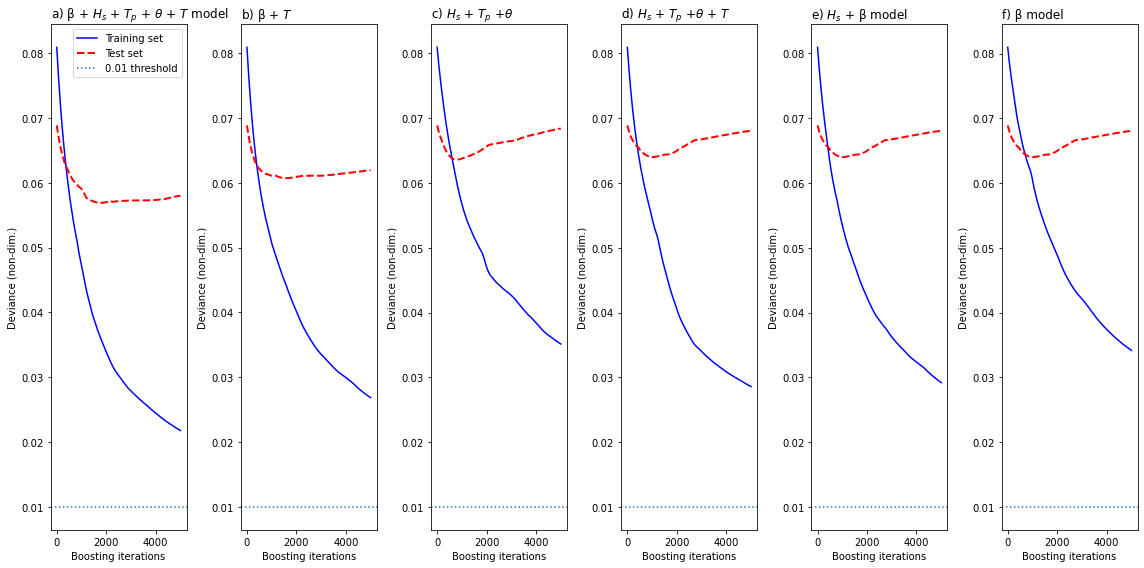

In [1310]:
fig=plt.figure(figsize=(16,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred1 in enumerate(model1.staged_predict(X_test1)):
    test_score[i] = model1.loss_(y_test1, y_pred1)
    
plt.subplot(1, 6, 1)
plt.title(r"a) β + $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model1.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred2 in enumerate(model2.staged_predict(X_test2)):
    test_score[i] = model2.loss_(y_test2, y_pred2)
    
plt.subplot(1, 6, 2)
plt.title("b) β + $T$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model2.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred3 in enumerate(model3.staged_predict(X_test3)):
    test_score[i] = model3.loss_(y_test3, y_pred3)
    
plt.subplot(1, 6, 3)
plt.title(r"c) $H_s$ + $T_p$ +$\theta$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model3.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred4 in enumerate(model4.staged_predict(X_test4)):
    test_score[i] = model4.loss_(y_test4, y_pred4)
    
plt.subplot(1, 6, 4)
plt.title(r"d) $H_s$ + $T_p$ +$\theta$ + $T$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model4.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

plt.subplot(1, 6, 5)
plt.title(r"e) $H_s$ + β model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model6.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

plt.subplot(1, 6, 6)
plt.title(r"f) β model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model7.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

fig.tight_layout()
# plt.show()
plt.savefig('CGRASP_d50-4models-training_Oz-all.jpg', dpi=300, bbox_inches='tight')

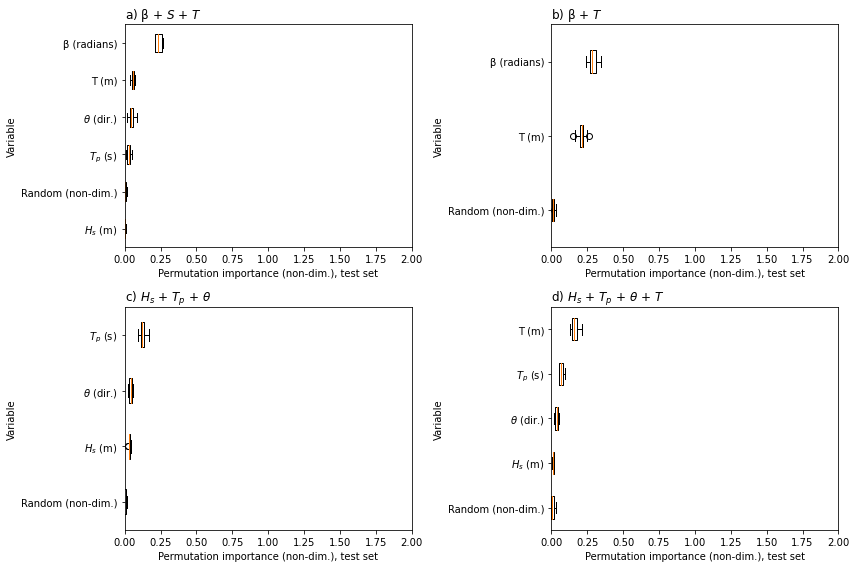

In [1311]:
fig=plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

result = permutation_importance(
    model1, X_test1, y_test1, n_repeats=10, random_state=2022, n_jobs=-1
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(221)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names1)[sorted_idx],
)
plt.xlim(0,2)
plt.title("a) β + $S$ + $T$ ", loc='left')
plt.xlabel("Permutation importance (non-dim.), test set")
plt.ylabel("Variable")


result = permutation_importance(
    model2, X_test2, y_test3, n_repeats=10, random_state=2022, n_jobs=-1
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(222)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names2)[sorted_idx],
)

plt.xlim(0,2)
plt.title("b) β + $T$ ", loc='left')
plt.xlabel("Permutation importance (non-dim.), test set")
plt.ylabel("Variable")

result = permutation_importance(
    model3, X_test3, y_test3, n_repeats=10, random_state=2022, n_jobs=-1
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(223)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names3)[sorted_idx],
)
plt.xlim(0,2)
plt.title(r"c) $H_s$ + $T_p$ + $\theta$ ", loc='left')
plt.xlabel("Permutation importance (non-dim.), test set")
plt.ylabel("Variable")

result = permutation_importance(
    model4, X_test4, y_test4, n_repeats=10, random_state=2022, n_jobs=-1
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(224)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names4)[sorted_idx],
)
plt.xlim(0,2)
plt.title(r"d) $H_s$ + $T_p$ + $\theta$ + $T$ ", loc='left')
plt.xlabel("Permutation importance (non-dim.), test set")
plt.ylabel("Variable")

fig.tight_layout()

plt.savefig('CGRASP_d50-4models-featimps_Oz-all.jpg', dpi=300, bbox_inches='tight')

### Meso-tidal

In [1312]:
# params = {
#     "n_estimators": 5000,
#     "max_depth": 3, #4,
#     "min_samples_split": 5, #10,
#     "learning_rate": 0.001, #0.01,
#     "loss": "squared_error",
#     "subsample": 0.25,
#     "max_leaf_nodes": 4,
# }

# test_size = 0.75

In [1313]:
rand = np.random.randn(len(tmp_meso))
np.save('Oz_rand_meso.npy', rand, allow_pickle=True)

In [1314]:
feature_names1 = ['β (radians)',r'$H_s$ (m)', 'T (m)',r'$T_p$ (s)', r'$\theta$ (dir.)','Random (non-dim.)'] 
X = np.stack((tmp_meso['beach_slope_average'],tmp_meso['Hs_max'],tmp_meso['mstr'] ,tmp_meso['Tp_mean'],tmp_meso['Wdir_weighted_mean'],  rand)) 
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, tmp_meso['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

# model1 = svm.SVR()
model1 = ensemble.GradientBoostingRegressor(**params)
# model1 = ensemble.HistGradientBoostingRegressor()#**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

The mean squared error (MSE) on test set: 0.0619


In [1315]:
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2022)
# # evaluate model
# scores = cross_val_score(model1, X.T, tmp_meso['d50'], scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# # force scores to be positive
# scores = np.absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [1316]:
model1out = {}
model1out['feature_names'] = feature_names1
model1out['Xtest'] = X_test1
model1out['Xtrain'] = X_train1
model1out['ytest'] = y_test1
model1out['ytrain'] = y_train1
model1out['model'] = model1
model1out['mse'] = mse1
# model1out['mean_xval'] = scores.mean()
# model1out['std_xval'] = scores.std()

In [1317]:
feature_names2 = [r'β (radians)','T (m)', 'Random (non-dim.)']
X = np.stack((tmp_meso['beach_slope_average'],tmp_meso['mstr'], rand))
X.shape

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X.T, tmp_meso['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

# model2 = svm.SVR()
model2 = ensemble.GradientBoostingRegressor(**params)
# model2 = ensemble.HistGradientBoostingRegressor()#**params)
model2.fit(X_train2, y_train2)

mse2 = mean_squared_error(y_test2, model2.predict(X_test2))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse2))

The mean squared error (MSE) on test set: 0.0656


In [1318]:
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2022)
# # evaluate model
# scores = cross_val_score(model2, X.T, tmp_meso['d50'], scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# # force scores to be positive
# scores = np.absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [1319]:
model2out = {}
model2out['feature_names'] = feature_names2
model2out['Xtest'] = X_test2
model2out['Xtrain'] = X_train2
model2out['ytest'] = y_test2
model2out['ytrain'] = y_train2
model2out['model'] = model2
model2out['mse'] = mse2
# model2out['mean_xval'] = scores.mean()
# model2out['std_xval'] = scores.std()

In [1320]:
feature_names3 = [r'$H_s$ (m)', r'$T_p$ (s)', r'$\theta$ (dir.)', 'Random (non-dim.)'] #
X = np.stack((tmp_meso['Hs_max'],tmp_meso['Tp_mean'],tmp_meso['Wdir_weighted_mean'], rand)) 
X.shape

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X.T, tmp_meso['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train3)
X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)

# model3 = svm.SVR()
# model3 = ensemble.HistGradientBoostingRegressor()#**params)
model3 = ensemble.GradientBoostingRegressor(**params)
model3.fit(X_train3, y_train3)

mse3 = mean_squared_error(y_test3, model3.predict(X_test3))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse3))

The mean squared error (MSE) on test set: 0.0750


In [1321]:
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2022)
# # evaluate model
# scores = cross_val_score(model3, X.T, tmp_meso['d50'], scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# # force scores to be positive
# scores = np.absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [1322]:
model3out = {}
model3out['feature_names'] = feature_names3
model3out['Xtest'] = X_test3
model3out['Xtrain'] = X_train3
model3out['ytest'] = y_test3
model3out['ytrain'] = y_train3
model3out['model'] = model3
model3out['mse'] = mse3
# model3out['mean_xval'] = scores.mean()
# model3out['std_xval'] = scores.std()

In [1323]:
feature_names4 = [r'$H_s$ (m)', 'T (m)',r'$T_p$ (s)', r'$\theta$ (dir.)', 'Random (non-dim.)'] #
X = np.stack((tmp_meso['Hs_max'],tmp_meso['mstr'] ,tmp_meso['Tp_mean'],tmp_meso['Wdir_weighted_mean'], rand)) 
X.shape

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X.T, tmp_meso['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train4)
X_train4 = scaler.transform(X_train4)
X_test4 = scaler.transform(X_test4)

# model4 = svm.SVR()
model4 = ensemble.GradientBoostingRegressor(**params)
# model4 = ensemble.HistGradientBoostingRegressor()#**params)
model4.fit(X_train4, y_train4)

mse4 = mean_squared_error(y_test4, model4.predict(X_test4))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse4))

The mean squared error (MSE) on test set: 0.0693


In [1324]:
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2022)
# # evaluate model
# scores = cross_val_score(model3, X.T, tmp_meso['d50'], scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# # force scores to be positive
# scores = np.absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [1325]:
model4out = {}
model4out['feature_names'] = feature_names4
model4out['Xtest'] = X_test4
model4out['Xtrain'] = X_train4
model4out['ytest'] = y_test4
model4out['ytrain'] = y_train4
model4out['model'] = model4
model4out['mse'] = mse4
# model4out['mean_xval'] = scores.mean()
# model4out['std_xval'] = scores.std()

In [1326]:
# feature_names5 = ['T (m)', 'Random (non-dim.)']
# X = np.stack((tmp_meso['mstr'], rand))
# X.shape

# X_train5, X_test5, y_train5, y_test5 = train_test_split(
#     X.T, tmp_meso['d50'], test_size=test_size, random_state=2022
# )

# scaler = preprocessing.StandardScaler().fit(X_train5)
# X_train5 = scaler.transform(X_train5)
# X_test5 = scaler.transform(X_test5)

# # model5 = svm.SVR()
# model5 = ensemble.GradientBoostingRegressor(**params)
# # model5 = ensemble.HistGradientBoostingRegressor()#**params)
# model5.fit(X_train5, y_train5)

# mse5 = mean_squared_error(y_test5, model5.predict(X_test5))
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse5))

In [1327]:
# model5out = {}
# model5out['feature_names'] = feature_names5
# model5out['Xtest'] = X_test5
# model5out['Xtrain'] = X_train5
# model5out['ytest'] = y_test5
# model5out['ytrain'] = y_train5
# model5out['model'] = model5
# model5out['mse'] = mse5

In [1328]:
feature_names6 = [r'β (radians)', r'$H_s$ (m)', 'Random (non-dim.)']
X = np.stack((tmp_meso['beach_slope_average'], tmp_meso['Hs_max'], rand))
X.shape

X_train6, X_test6, y_train6, y_test6 = train_test_split(
    X.T, tmp_meso['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train6)
X_train6 = scaler.transform(X_train6)
X_test6 = scaler.transform(X_test6)

# model6 = svm.SVR()
# model6 = ensemble.HistGradientBoostingRegressor()#**params)
model6 = ensemble.GradientBoostingRegressor(**params)
model6.fit(X_train6, y_train6)

mse6 = mean_squared_error(y_test6, model6.predict(X_test6))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse6))

The mean squared error (MSE) on test set: 0.0778


In [1329]:
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2022)
# # evaluate model
# scores = cross_val_score(model6, X.T, tmp_meso['d50'], scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# # force scores to be positive
# scores = np.absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [1330]:
model6out = {}
model6out['feature_names'] = feature_names6
model6out['Xtest'] = X_test6
model6out['Xtrain'] = X_train6
model6out['ytest'] = y_test6
model6out['ytrain'] = y_train6
model6out['model'] = model6
model6out['mse'] = mse6
# model5out['mean_xval'] = scores.mean()
# model5out['std_xval'] = scores.std()

In [1331]:
feature_names7 = [r'β (radians)', 'Random (non-dim.)']
X = np.stack((tmp_meso['beach_slope_average'], rand))
X.shape

X_train7, X_test7, y_train7, y_test7 = train_test_split(
    X.T, tmp_meso['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train7)
X_train7 = scaler.transform(X_train7)
X_test7 = scaler.transform(X_test7)

# model7 = svm.SVR()
# model7 = ensemble.HistGradientBoostingRegressor()#**params)
model7 = ensemble.GradientBoostingRegressor(**params)
model7.fit(X_train7, y_train7)

mse7 = mean_squared_error(y_test7, model7.predict(X_test7))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse7))

The mean squared error (MSE) on test set: 0.0792


In [1332]:
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2022)
# # evaluate model
# scores = cross_val_score(model7, X.T, tmp_meso['d50'], scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# # force scores to be positive
# scores = np.absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [1333]:
model7out = {}
model7out['feature_names'] = feature_names7
model7out['Xtest'] = X_test7
model7out['Xtrain'] = X_train7
model7out['ytest'] = y_test7
model7out['ytrain'] = y_train7
model7out['model'] = model7
model7out['mse'] = mse7
# model7out['mean_xval'] = scores.mean()
# model7out['std_xval'] = scores.std()

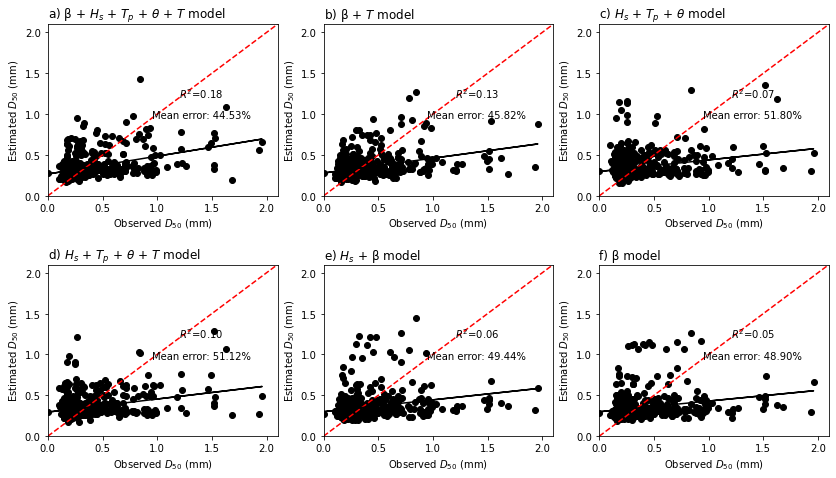

In [1334]:
plt.figure(figsize=(14,12))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.subplot(331)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) β + $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

pe = prc_err(y_test1, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.95,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')

plt.subplot(332)
ds_est = model2.predict(X_test2)
plt.plot(y_test2, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("b) β + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test2, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test2, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test2, poly1d_fn(y_test2), '-k')

pe = prc_err(y_test2, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.95,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

plt.subplot(333)
ds_est = model3.predict(X_test3)
plt.plot(y_test3, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) $H_s$ + $T_p$ + $\theta$ model", loc='left')
r2 = np.min(np.corrcoef(y_test3, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test3, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test3, poly1d_fn(y_test3), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test3,ds_est)))[:5]))
pe = prc_err(y_test3, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.95,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

plt.subplot(334)
ds_est = model4.predict(X_test4)
plt.plot(y_test4, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test4, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test4, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test4, poly1d_fn(y_test4), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test4,ds_est)))[:5]))
pe = prc_err(y_test4, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.95,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

# plt.subplot(335)
# ds_est = model5.predict(X_test5)
# plt.plot(y_test5, ds_est, 'ko')
# plt.xlim(0,2.1); plt.ylim(0,2.1)
# yl=plt.ylim()
# plt.plot(yl,yl,'--r')
# plt.xlabel(r'Observed $D_{50}$ (mm)')
# plt.ylabel(r'Estimated $D_{50}$ (mm)')
# plt.title(r"e) $T$ model", loc='left')
# r2 = np.min(np.corrcoef(y_test5, ds_est))**2
# plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

# coef = np.polyfit(y_test5, ds_est,1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(y_test5, poly1d_fn(y_test5), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test5,ds_est)))[:5]))


plt.subplot(335)
ds_est = model6.predict(X_test6)
plt.plot(y_test6, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) $H_s$ + β model", loc='left')
r2 = np.min(np.corrcoef(y_test6, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test6, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test6, poly1d_fn(y_test6), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test6,ds_est)))[:5]))
pe = prc_err(y_test6, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.95,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))


plt.subplot(336)
ds_est = model7.predict(X_test7)
plt.plot(y_test7, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) β model", loc='left')
r2 = np.min(np.corrcoef(y_test7, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test7, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test7, poly1d_fn(y_test7), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test7,ds_est)))[:5]))
pe = prc_err(y_test7, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.95,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

plt.savefig('CGRASP_d50-6models_Oz-meso.jpg', dpi=300, bbox_inches='tight')
# plt.close()

C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


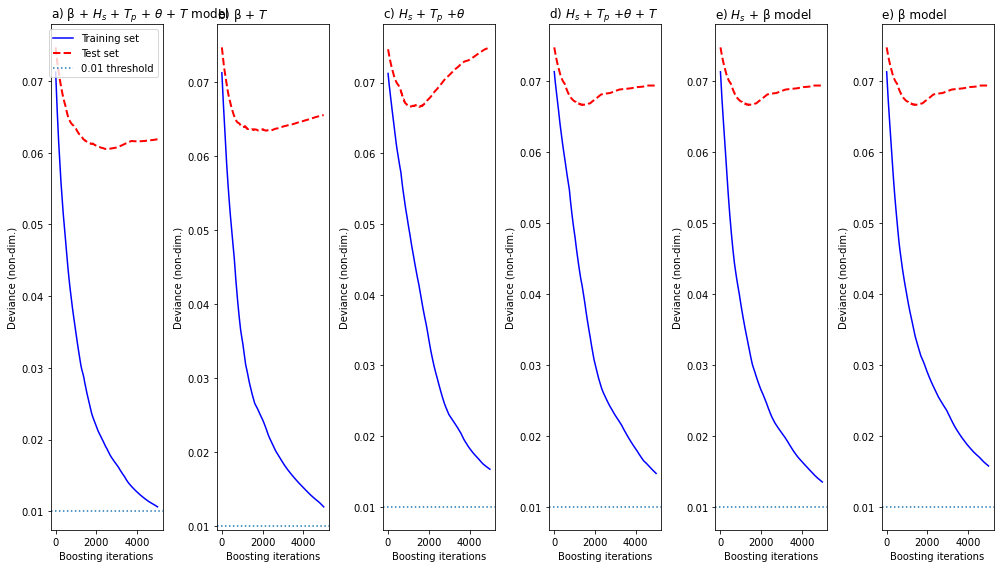

In [1335]:
fig=plt.figure(figsize=(14,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred1 in enumerate(model1.staged_predict(X_test1)):
    test_score[i] = model1.loss_(y_test1, y_pred1)
    
plt.subplot(1, 6, 1)
plt.title(r"a) β + $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model1.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred2 in enumerate(model2.staged_predict(X_test2)):
    test_score[i] = model2.loss_(y_test2, y_pred2)
    
plt.subplot(1, 6, 2)
plt.title("b) β + $T$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model2.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred3 in enumerate(model3.staged_predict(X_test3)):
    test_score[i] = model3.loss_(y_test3, y_pred3)
    
plt.subplot(1, 6, 3)
plt.title(r"c) $H_s$ + $T_p$ +$\theta$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model3.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred4 in enumerate(model4.staged_predict(X_test4)):
    test_score[i] = model4.loss_(y_test4, y_pred4)
    
plt.subplot(1, 6, 4)
plt.title(r"d) $H_s$ + $T_p$ +$\theta$ + $T$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model4.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

plt.subplot(1, 6, 5)
plt.title(r"e) $H_s$ + β model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model6.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

plt.subplot(1, 6, 6)
plt.title(r"e) β model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model7.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

fig.tight_layout()
# plt.show()
plt.savefig('CGRASP_d50-4models-training_Oz-meso.jpg', dpi=300, bbox_inches='tight')

### Micro-tidal

In [1336]:
# params = {
#     "n_estimators": 5000,
#     "max_depth": 3, #4,
#     "min_samples_split": 5, #10,
#     "learning_rate": 0.001, #0.01,
#     "loss": "squared_error",
#     "subsample": 0.25,
#     "max_leaf_nodes": 4,
# }

# test_size = 0.75

In [1337]:
rand = np.random.randn(len(tmp_micro))
np.save('Oz_rand_micro.npy', rand, allow_pickle=True)

In [1338]:
feature_names1 = ['β (radians)',r'$H_s$ (m)', 'T (m)',r'$T_p$ (s)', r'$\theta$ (dir.)','Random (non-dim.)'] 
X = np.stack((tmp_micro['beach_slope_average'],tmp_micro['Hs_max'],tmp_micro['mstr'] ,tmp_micro['Tp_mean'],tmp_micro['Wdir_weighted_mean'],  rand)) 
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, tmp_micro['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

# model1 = svm.SVR()
model1 = ensemble.GradientBoostingRegressor(**params)
# model1 = ensemble.HistGradientBoostingRegressor()#**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

The mean squared error (MSE) on test set: 0.0469


In [1339]:
feature_names2 = [r'β (radians)','T (m)', 'Random (non-dim.)']
X = np.stack((tmp_micro['beach_slope_average'],tmp_micro['mstr'], rand))
X.shape

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X.T, tmp_micro['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

# model2 = svm.SVR()
model2 = ensemble.GradientBoostingRegressor(**params)
# model2 = ensemble.HistGradientBoostingRegressor()#**params)
model2.fit(X_train2, y_train2)

mse2 = mean_squared_error(y_test2, model2.predict(X_test2))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse2))

The mean squared error (MSE) on test set: 0.0489


In [1340]:
feature_names3 = [r'$H_s$ (m)', r'$T_p$ (s)', r'$\theta$ (dir.)', 'Random (non-dim.)'] #
X = np.stack((tmp_micro['Hs_max'],tmp_micro['Tp_mean'],tmp_micro['Wdir_weighted_mean'], rand)) 
X.shape

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X.T, tmp_micro['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train3)
X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)

# model3 = svm.SVR()
# model3 = ensemble.HistGradientBoostingRegressor()#**params)
model3 = ensemble.GradientBoostingRegressor(**params)
model3.fit(X_train3, y_train3)

mse3 = mean_squared_error(y_test3, model3.predict(X_test3))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse3))

The mean squared error (MSE) on test set: 0.0371


In [1341]:
feature_names4 = [r'$H_s$ (m)', 'T (m)',r'$T_p$ (s)', r'$\theta$ (dir.)', 'Random (non-dim.)'] #
X = np.stack((tmp_micro['Hs_max'],tmp_micro['mstr'] ,tmp_micro['Tp_mean'],tmp_micro['Wdir_weighted_mean'], rand)) 
X.shape

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X.T, tmp_micro['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train4)
X_train4 = scaler.transform(X_train4)
X_test4 = scaler.transform(X_test4)

# model4 = svm.SVR()
model4 = ensemble.GradientBoostingRegressor(**params)
# model4 = ensemble.HistGradientBoostingRegressor()#**params)
model4.fit(X_train4, y_train4)

mse4 = mean_squared_error(y_test4, model4.predict(X_test4))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse4))

The mean squared error (MSE) on test set: 0.0382


In [1342]:
feature_names6 = [r'β (radians)', r'$H_s$ (m)', 'Random (non-dim.)']
X = np.stack((tmp_micro['beach_slope_average'], tmp_micro['Hs_max'], rand))
X.shape

X_train6, X_test6, y_train6, y_test6 = train_test_split(
    X.T, tmp_micro['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train6)
X_train6 = scaler.transform(X_train6)
X_test6 = scaler.transform(X_test6)

# model6 = svm.SVR()
# model6 = ensemble.HistGradientBoostingRegressor()#**params)
model6 = ensemble.GradientBoostingRegressor(**params)
model6.fit(X_train6, y_train6)

mse6 = mean_squared_error(y_test6, model6.predict(X_test6))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse6))

The mean squared error (MSE) on test set: 0.0476


In [1343]:
feature_names7 = [r'β (radians)', 'Random (non-dim.)']
X = np.stack((tmp_micro['beach_slope_average'], rand))
X.shape

X_train7, X_test7, y_train7, y_test7 = train_test_split(
    X.T, tmp_micro['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train7)
X_train7 = scaler.transform(X_train7)
X_test7 = scaler.transform(X_test7)

# model7 = svm.SVR()
# model7 = ensemble.HistGradientBoostingRegressor()#**params)
model7 = ensemble.GradientBoostingRegressor(**params)
model7.fit(X_train7, y_train7)

mse7 = mean_squared_error(y_test7, model7.predict(X_test7))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse7))

The mean squared error (MSE) on test set: 0.0539


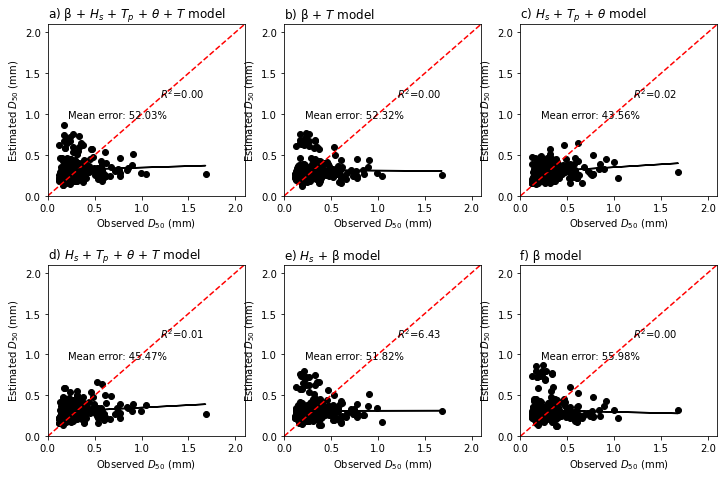

In [1344]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.subplot(331)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) β + $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

pe = prc_err(y_test1, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')

plt.subplot(332)
ds_est = model2.predict(X_test2)
plt.plot(y_test2, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("b) β + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test2, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test2, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test2, poly1d_fn(y_test2), '-k')

pe = prc_err(y_test2, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

plt.subplot(333)
ds_est = model3.predict(X_test3)
plt.plot(y_test3, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) $H_s$ + $T_p$ + $\theta$ model", loc='left')
r2 = np.min(np.corrcoef(y_test3, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test3, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test3, poly1d_fn(y_test3), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test3,ds_est)))[:5]))
pe = prc_err(y_test3, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

plt.subplot(334)
ds_est = model4.predict(X_test4)
plt.plot(y_test4, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test4, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test4, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test4, poly1d_fn(y_test4), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test4,ds_est)))[:5]))
pe = prc_err(y_test4, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

# plt.subplot(335)
# ds_est = model5.predict(X_test5)
# plt.plot(y_test5, ds_est, 'ko')
# plt.xlim(0,2.1); plt.ylim(0,2.1)
# yl=plt.ylim()
# plt.plot(yl,yl,'--r')
# plt.xlabel(r'Observed $D_{50}$ (mm)')
# plt.ylabel(r'Estimated $D_{50}$ (mm)')
# plt.title(r"e) $T$ model", loc='left')
# r2 = np.min(np.corrcoef(y_test5, ds_est))**2
# plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

# coef = np.polyfit(y_test5, ds_est,1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(y_test5, poly1d_fn(y_test5), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test5,ds_est)))[:5]))


plt.subplot(335)
ds_est = model6.predict(X_test6)
plt.plot(y_test6, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) $H_s$ + β model", loc='left')
r2 = np.min(np.corrcoef(y_test6, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test6, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test6, poly1d_fn(y_test6), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test6,ds_est)))[:5]))
pe = prc_err(y_test6, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))


plt.subplot(336)
ds_est = model7.predict(X_test7)
plt.plot(y_test7, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) β model", loc='left')
r2 = np.min(np.corrcoef(y_test7, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test7, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test7, poly1d_fn(y_test7), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test7,ds_est)))[:5]))
pe = prc_err(y_test7, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))


plt.savefig('CGRASP_d50-6models_Oz-micro.jpg', dpi=300, bbox_inches='tight')
# plt.close()

C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


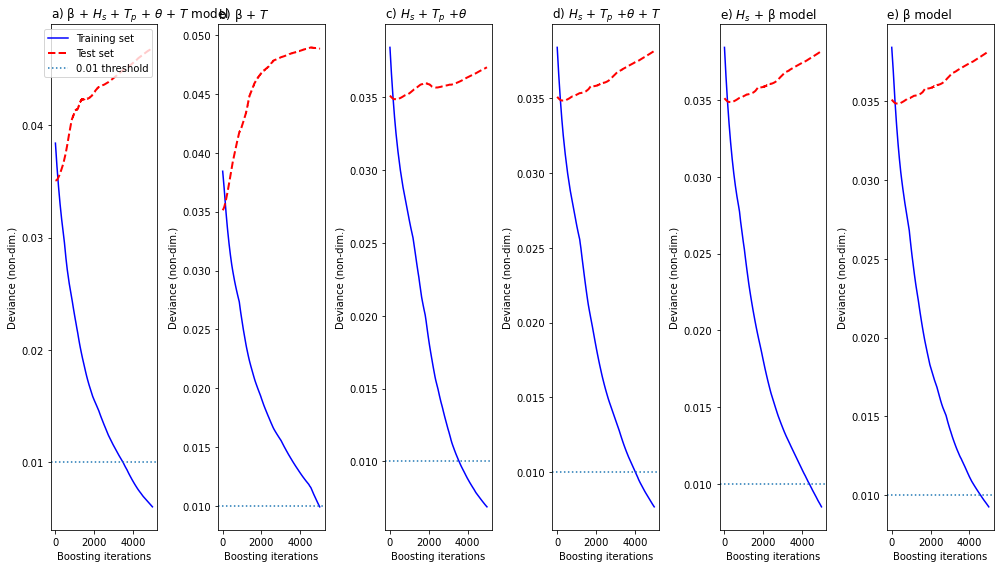

In [1345]:
fig=plt.figure(figsize=(14,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred1 in enumerate(model1.staged_predict(X_test1)):
    test_score[i] = model1.loss_(y_test1, y_pred1)
    
plt.subplot(1, 6, 1)
plt.title(r"a) β + $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model1.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred2 in enumerate(model2.staged_predict(X_test2)):
    test_score[i] = model2.loss_(y_test2, y_pred2)
    
plt.subplot(1, 6, 2)
plt.title("b) β + $T$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model2.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred3 in enumerate(model3.staged_predict(X_test3)):
    test_score[i] = model3.loss_(y_test3, y_pred3)
    
plt.subplot(1, 6, 3)
plt.title(r"c) $H_s$ + $T_p$ +$\theta$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model3.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred4 in enumerate(model4.staged_predict(X_test4)):
    test_score[i] = model4.loss_(y_test4, y_pred4)
    
plt.subplot(1, 6, 4)
plt.title(r"d) $H_s$ + $T_p$ +$\theta$ + $T$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model4.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

plt.subplot(1, 6, 5)
plt.title(r"e) $H_s$ + β model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model6.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

plt.subplot(1, 6, 6)
plt.title(r"e) β model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model7.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

fig.tight_layout()
# plt.show()
plt.savefig('CGRASP_d50-4models-training_Oz-micro.jpg', dpi=300, bbox_inches='tight')

### Macro-tidal

In [1346]:
# params = {
#     "n_estimators": 5000,
#     "max_depth": 3, #4,
#     "min_samples_split": 5, #10,
#     "learning_rate": 0.001, #0.01,
#     "loss": "squared_error",
#     "subsample": 0.25,
#     "max_leaf_nodes": 4,
# }

# test_size = 0.75

In [1347]:
rand = np.random.randn(len(tmp_macro))
np.save('Oz_rand_macro.npy', rand, allow_pickle=True)

In [1348]:
feature_names1 = ['β (radians)',r'$H_s$ (m)', 'T (m)',r'$T_p$ (s)', r'$\theta$ (dir.)','Random (non-dim.)'] 
X = np.stack((tmp_macro['beach_slope_average'],tmp_macro['Hs_max'],tmp_macro['mstr'] ,tmp_macro['Tp_mean'],tmp_macro['Wdir_weighted_mean'],  rand)) 
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, tmp_macro['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

# model1 = svm.SVR()
model1 = ensemble.GradientBoostingRegressor(**params)
# model1 = ensemble.HistGradientBoostingRegressor()#**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

The mean squared error (MSE) on test set: 0.1910


In [1349]:
feature_names2 = [r'β (radians)','T (m)', 'Random (non-dim.)']
X = np.stack((tmp_macro['beach_slope_average'],tmp_macro['mstr'], rand))
X.shape

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X.T, tmp_macro['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

# model2 = svm.SVR()
model2 = ensemble.GradientBoostingRegressor(**params)
# model2 = ensemble.HistGradientBoostingRegressor()#**params)
model2.fit(X_train2, y_train2)

mse2 = mean_squared_error(y_test2, model2.predict(X_test2))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse2))

The mean squared error (MSE) on test set: 0.2032


In [1350]:
feature_names3 = [r'$H_s$ (m)', r'$T_p$ (s)', r'$\theta$ (dir.)', 'Random (non-dim.)'] #
X = np.stack((tmp_macro['Hs_max'],tmp_macro['Tp_mean'],tmp_macro['Wdir_weighted_mean'], rand)) 
X.shape

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X.T, tmp_macro['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train3)
X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)

# model3 = svm.SVR()
# model3 = ensemble.HistGradientBoostingRegressor()#**params)
model3 = ensemble.GradientBoostingRegressor(**params)
model3.fit(X_train3, y_train3)

mse3 = mean_squared_error(y_test3, model3.predict(X_test3))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse3))

The mean squared error (MSE) on test set: 0.2164


In [1351]:
feature_names4 = [r'$H_s$ (m)', 'T (m)',r'$T_p$ (s)', r'$\theta$ (dir.)', 'Random (non-dim.)'] #
X = np.stack((tmp_macro['Hs_max'],tmp_macro['mstr'] ,tmp_macro['Tp_mean'],tmp_macro['Wdir_weighted_mean'], rand)) 
X.shape

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X.T, tmp_macro['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train4)
X_train4 = scaler.transform(X_train4)
X_test4 = scaler.transform(X_test4)

# model4 = svm.SVR()
model4 = ensemble.GradientBoostingRegressor(**params)
# model4 = ensemble.HistGradientBoostingRegressor()#**params)
model4.fit(X_train4, y_train4)

mse4 = mean_squared_error(y_test4, model4.predict(X_test4))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse4))

The mean squared error (MSE) on test set: 0.1962


In [1352]:
feature_names6 = [r'β (radians)', r'$H_s$ (m)', 'Random (non-dim.)']
X = np.stack((tmp_macro['beach_slope_average'], tmp_macro['Hs_max'], rand))
X.shape

X_train6, X_test6, y_train6, y_test6 = train_test_split(
    X.T, tmp_macro['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train6)
X_train6 = scaler.transform(X_train6)
X_test6 = scaler.transform(X_test6)

# model6 = svm.SVR()
# model6 = ensemble.HistGradientBoostingRegressor()#**params)
model6 = ensemble.GradientBoostingRegressor(**params)
model6.fit(X_train6, y_train6)

mse6 = mean_squared_error(y_test6, model6.predict(X_test6))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse6))

The mean squared error (MSE) on test set: 0.1972


In [1353]:
feature_names7 = [r'β (radians)', 'Random (non-dim.)']
X = np.stack((tmp_macro['beach_slope_average'], rand))
X.shape

X_train7, X_test7, y_train7, y_test7 = train_test_split(
    X.T, tmp_macro['d50'], test_size=test_size, random_state=2022
)

scaler = preprocessing.StandardScaler().fit(X_train7)
X_train7 = scaler.transform(X_train7)
X_test7 = scaler.transform(X_test7)

# model7 = svm.SVR()
# model7 = ensemble.HistGradientBoostingRegressor()#**params)
model7 = ensemble.GradientBoostingRegressor(**params)
model7.fit(X_train7, y_train7)

mse7 = mean_squared_error(y_test7, model7.predict(X_test7))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse7))

The mean squared error (MSE) on test set: 0.2082


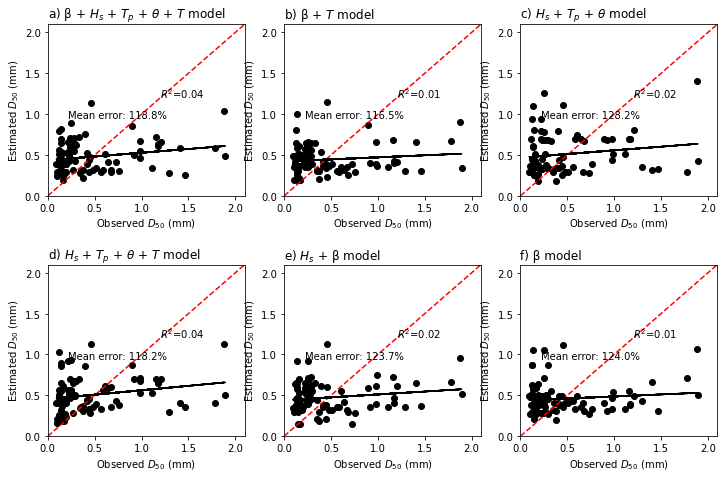

In [1354]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.subplot(331)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) β + $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

pe = prc_err(y_test1, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')

plt.subplot(332)
ds_est = model2.predict(X_test2)
plt.plot(y_test2, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("b) β + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test2, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test2, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test2, poly1d_fn(y_test2), '-k')

pe = prc_err(y_test2, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

plt.subplot(333)
ds_est = model3.predict(X_test3)
plt.plot(y_test3, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) $H_s$ + $T_p$ + $\theta$ model", loc='left')
r2 = np.min(np.corrcoef(y_test3, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test3, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test3, poly1d_fn(y_test3), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test3,ds_est)))[:5]))
pe = prc_err(y_test3, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

plt.subplot(334)
ds_est = model4.predict(X_test4)
plt.plot(y_test4, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test4, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test4, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test4, poly1d_fn(y_test4), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test4,ds_est)))[:5]))
pe = prc_err(y_test4, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))

# plt.subplot(335)
# ds_est = model5.predict(X_test5)
# plt.plot(y_test5, ds_est, 'ko')
# plt.xlim(0,2.1); plt.ylim(0,2.1)
# yl=plt.ylim()
# plt.plot(yl,yl,'--r')
# plt.xlabel(r'Observed $D_{50}$ (mm)')
# plt.ylabel(r'Estimated $D_{50}$ (mm)')
# plt.title(r"e) $T$ model", loc='left')
# r2 = np.min(np.corrcoef(y_test5, ds_est))**2
# plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

# coef = np.polyfit(y_test5, ds_est,1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(y_test5, poly1d_fn(y_test5), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test5,ds_est)))[:5]))


plt.subplot(335)
ds_est = model6.predict(X_test6)
plt.plot(y_test6, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) $H_s$ + β model", loc='left')
r2 = np.min(np.corrcoef(y_test6, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test6, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test6, poly1d_fn(y_test6), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test6,ds_est)))[:5]))
pe = prc_err(y_test6, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))


plt.subplot(336)
ds_est = model7.predict(X_test7)
plt.plot(y_test7, ds_est, 'ko')
plt.xlim(0,2.1); plt.ylim(0,2.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) β model", loc='left')
r2 = np.min(np.corrcoef(y_test7, ds_est))**2
plt.text(1.2,1.2,r'$R^2$='+str(r2)[:4], color='k')

coef = np.polyfit(y_test7, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test7, poly1d_fn(y_test7), '-k')
# plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test7,ds_est)))[:5]))
pe = prc_err(y_test7, ds_est).values
ind = np.where(~np.isinf(pe))[0]
pe = pe[ind]
plt.text(.22,.95, r'Mean error: {}%'.format(str(np.mean(pe))[:5]))


plt.savefig('CGRASP_d50-6models_Oz-macro.jpg', dpi=300, bbox_inches='tight')
# plt.close()

C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


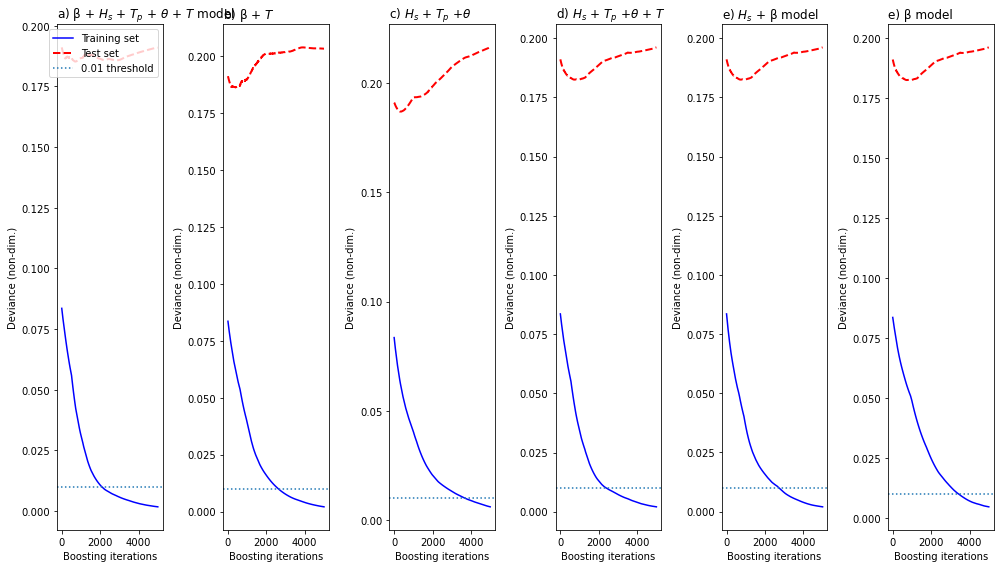

In [1355]:
fig=plt.figure(figsize=(14,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred1 in enumerate(model1.staged_predict(X_test1)):
    test_score[i] = model1.loss_(y_test1, y_pred1)
    
plt.subplot(1, 6, 1)
plt.title(r"a) β + $H_s$ + $T_p$ + $\theta$ + $T$ model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model1.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred2 in enumerate(model2.staged_predict(X_test2)):
    test_score[i] = model2.loss_(y_test2, y_pred2)
    
plt.subplot(1, 6, 2)
plt.title("b) β + $T$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model2.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred3 in enumerate(model3.staged_predict(X_test3)):
    test_score[i] = model3.loss_(y_test3, y_pred3)
    
plt.subplot(1, 6, 3)
plt.title(r"c) $H_s$ + $T_p$ +$\theta$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model3.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred4 in enumerate(model4.staged_predict(X_test4)):
    test_score[i] = model4.loss_(y_test4, y_pred4)
    
plt.subplot(1, 6, 4)
plt.title(r"d) $H_s$ + $T_p$ +$\theta$ + $T$", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model4.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

plt.subplot(1, 6, 5)
plt.title(r"e) $H_s$ + β model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model6.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

plt.subplot(1, 6, 6)
plt.title(r"e) β model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model7.train_score_,
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test set", lw=2
)
plt.axhline(0.01, linestyle=':',label='0.01 threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,.06)

fig.tight_layout()
# plt.show()
plt.savefig('CGRASP_d50-4models-training_Oz-macro.jpg', dpi=300, bbox_inches='tight')

In [298]:
# !conda install -c conda-forge py-xgboost -y

In [1119]:
# from sklearn.neural_network import MLPRegressor